<a href="https://colab.research.google.com/github/LathaGovindarajan/Machine-Learning/blob/main/regularisation_mnist_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.optimizers import Adam, RMSprop
from keras import backend as K

In [ ]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

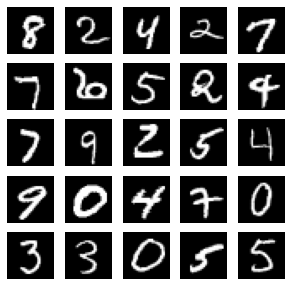

In [ ]:
#sample 25mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

#plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5,5, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig('mnist-samples.png')
plt.close('all')

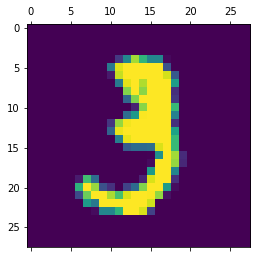

In [ ]:
plt.matshow(x_train[10])

In [ ]:
y_train[10]

3

In [ ]:
x_train.shape

(60000, 28, 28)

#covert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#image dimensions
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [ ]:
#resize and normalize
x_train = np.reshape(x_train,[-1, input_size])
x_train[20]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
       190,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        13,  25,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 112, 252, 125,   4,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 132, 252, 113,   0,   0,   0,   0,   0,   0,   

In [ ]:
x_train = x_train.astype('float32')/255
x_train[20]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_test = np.reshape(x_test,[-1, input_size])
x_test[5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        77, 254, 107,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
x_test = x_test.astype('float32')/255
x_test[5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#network paramters
batch_size = 128
hidden_units = 20
dropout = 0.45

In [ ]:
num_labels = len(np.unique(y_train))

In [ ]:
#model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim= input_size))
model.add(Activation('relu'))

model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_labels))
model.add(Activation('softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                15700     
                                                                 
 activation_3 (Activation)   (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 activation_4 (Activation)   (None, 20)                0         
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 activation_5 (Activation)   (None, 10)               

In [ ]:
import pydot

In [ ]:
import graphviz

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [ ]:
#if multiclass: sparse_categorical_crossentropy, if binary: binary_crossentropy
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
h1 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size= batch_size)

Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 1.0845 - accuracy: 0.6379 - val_loss: 0.3879 - val_accuracy: 0.8965
Epoch 2/20
469/469 [==============================] - 0s 984us/step - loss: 0.6004 - accuracy: 0.8130 - val_loss: 0.2837 - val_accuracy: 0.9182
Epoch 3/20
469/469 [==============================] - 0s 981us/step - loss: 0.5014 - accuracy: 0.8447 - val_loss: 0.2463 - val_accuracy: 0.9256
Epoch 4/20
469/469 [==============================] - 0s 978us/step - loss: 0.4534 - accuracy: 0.8599 - val_loss: 0.2242 - val_accuracy: 0.9331
Epoch 5/20
469/469 [==============================] - 0s 984us/step - loss: 0.4297 - accuracy: 0.8686 - val_loss: 0.2106 - val_accuracy: 0.9399
Epoch 6/20
469/469 [==============================] - 0s 986us/step - loss: 0.4049 - accuracy: 0.8756 - val_loss: 0.2019 - val_accuracy: 0.9414
Epoch 7/20
469/469 [==============================] - 0s 980us/step - loss: 0.3841 - accuracy: 0.8820 - val_loss: 0.1990 - val_accuracy: 0

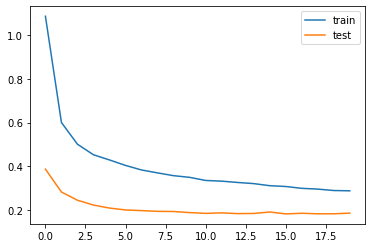

In [ ]:
#plot training history
plt.plot(h1.history['loss'], label='train')
plt.plot(h1.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
model2 = Sequential()
model2.add(Dense(hidden_units, input_dim= input_size))
model2.add(Activation('relu'))

model2.add(Dense(hidden_units))
model2.add(Activation('relu'))

model2.add(Dense(num_labels))
model2.add(Activation('softmax'))

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
h2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size= batch_size)

Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 0.5683 - accuracy: 0.8326 - val_loss: 0.2890 - val_accuracy: 0.9144
Epoch 2/20
469/469 [==============================] - 0s 944us/step - loss: 0.2561 - accuracy: 0.9270 - val_loss: 0.2237 - val_accuracy: 0.9346
Epoch 3/20
469/469 [==============================] - 0s 950us/step - loss: 0.2080 - accuracy: 0.9400 - val_loss: 0.1895 - val_accuracy: 0.9426
Epoch 4/20
469/469 [==============================] - 0s 961us/step - loss: 0.1838 - accuracy: 0.9468 - val_loss: 0.1798 - val_accuracy: 0.9466
Epoch 5/20
469/469 [==============================] - 0s 944us/step - loss: 0.1659 - accuracy: 0.9517 - val_loss: 0.1667 - val_accuracy: 0.9507
Epoch 6/20
469/469 [==============================] - 0s 953us/step - loss: 0.1556 - accuracy: 0.9545 - val_loss: 0.1614 - val_accuracy: 0.9520
Epoch 7/20
469/469 [==============================] - 0s 947us/step - loss: 0.1467 - accuracy: 0.9574 - val_loss: 0.1500 - val_accuracy: 0

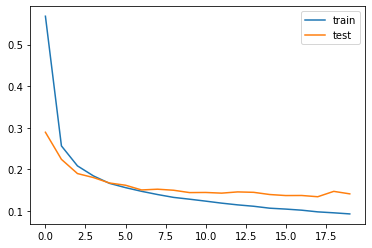

In [ ]:
plt.plot(h2.history['loss'], label='train')
plt.plot(h2.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
from tensorflow import keras
model3 = Sequential()
model3.add(Dense(hidden_units, input_dim= input_size))
model3.add(Activation('relu'))

model3.add(Dense(hidden_units,kernel_regularizer=keras.regularizers.l2(0.001)))
model3.add(Activation('relu'))

model3.add(Dense(num_labels))
model3.add(Activation('softmax'))

In [ ]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
h3 = model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size= batch_size)

Epoch 1/20
469/469 [==============================] - 1s 1ms/step - loss: 0.6129 - accuracy: 0.8310 - val_loss: 0.3135 - val_accuracy: 0.9177
Epoch 2/20
469/469 [==============================] - 0s 969us/step - loss: 0.2958 - accuracy: 0.9229 - val_loss: 0.2702 - val_accuracy: 0.9272
Epoch 3/20
469/469 [==============================] - 0s 962us/step - loss: 0.2539 - accuracy: 0.9339 - val_loss: 0.2357 - val_accuracy: 0.9379
Epoch 4/20
469/469 [==============================] - 0s 977us/step - loss: 0.2289 - accuracy: 0.9406 - val_loss: 0.2165 - val_accuracy: 0.9456
Epoch 5/20
469/469 [==============================] - 0s 964us/step - loss: 0.2093 - accuracy: 0.9469 - val_loss: 0.2063 - val_accuracy: 0.9447
Epoch 6/20
469/469 [==============================] - 0s 971us/step - loss: 0.1945 - accuracy: 0.9509 - val_loss: 0.1932 - val_accuracy: 0.9513
Epoch 7/20
469/469 [==============================] - 0s 967us/step - loss: 0.1820 - accuracy: 0.9539 - val_loss: 0.1881 - val_accuracy: 0

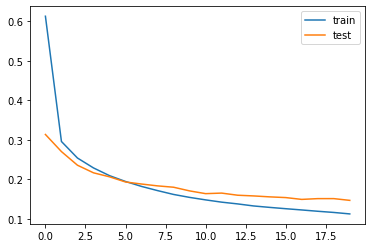

In [ ]:
plt.plot(h3.history['loss'], label='train')
plt.plot(h3.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
from keras.callbacks import EarlyStopping
model4 = Sequential()
model4.add(Dense(hidden_units, input_dim= input_size))
model4.add(Activation('relu'))

model4.add(Dense(hidden_units))
model4.add(Activation('relu'))
model4.add(Dropout(dropout))

model4.add(Dense(num_labels))
model4.add(Activation('softmax'))

In [ ]:
model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
#fit model
h4 = model4.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4000, verbose=0, callbacks=[es])

Epoch 2: early stopping


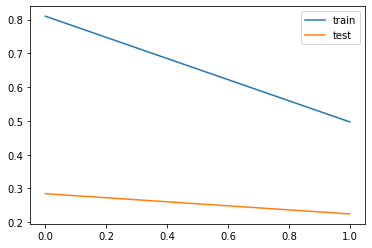

In [ ]:
plt.plot(h4.history['loss'], label='train')
plt.plot(h4.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
model5 = Sequential()
model5.add(Dense(hidden_units, input_dim= input_size))
model5.add(Activation('relu'))

model5.add(Dense(hidden_units,kernel_regularizer=keras.regularizers.l2(0.001)))
model5.add(Activation('relu'))
model5.add(Dropout(dropout))

model5.add(Dense(hidden_units))
model5.add(Activation('relu'))

model5.add(Dense(num_labels))
model5.add(Activation('softmax'))

In [ ]:
model5 = Sequential()

model5.add(Dense(512, activation='relu', input_dim= input_size))
model5.add(Dropout(0.2))

model5.add(Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model5.add(Dropout(0.2))

model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.2))

model5.add(Dense(10, activation='softmax'))

In [ ]:
model5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
h5 = model5.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size= 256)

Epoch 1/20
235/235 [==============================] - 3s 13ms/step - loss: 0.6064 - accuracy: 0.9046 - val_loss: 0.2872 - val_accuracy: 0.9625
Epoch 2/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2368 - accuracy: 0.9623 - val_loss: 0.1682 - val_accuracy: 0.9721
Epoch 3/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1560 - accuracy: 0.9708 - val_loss: 0.1249 - val_accuracy: 0.9768
Epoch 4/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1185 - accuracy: 0.9772 - val_loss: 0.1206 - val_accuracy: 0.9755
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1044 - accuracy: 0.9790 - val_loss: 0.1017 - val_accuracy: 0.9813
Epoch 6/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0912 - accuracy: 0.9826 - val_loss: 0.1058 - val_accuracy: 0.9779
Epoch 7/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0860 - accuracy: 0.9835 - val_loss: 0.1062 - val_accuracy: 0.9769